ImbalancedData Classification Task \
Author: Sridivya Pagadala 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import ShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.model_selection import cross_val_score,cross_validate

from sklearn.model_selection import train_test_split

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

from sklearn.metrics import roc_curve

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import ShuffleSplit,RepeatedStratifiedKFold

In [ ]:
data = pd.read_csv('http://kdd.ics.uci.edu/databases/tic/ticdata2000.txt', header = None, sep="\t")
X_test=pd.read_csv('http://kdd.ics.uci.edu/databases/tic/ticeval2000.txt', header = None, sep="\t")
y_test= pd.read_csv('http://kdd.ics.uci.edu/databases/tic/tictgts2000.txt', header = None, sep="\t")

In [ ]:
data.columns=['V'+str(i) for i in range(86)]
X_test.columns=['V'+str(i) for i in range(85)]

In [ ]:
data.head()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,...,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85
0,33,1,3,2,8,0,5,1,3,7,0,2,1,2,6,1,2,7,1,0,1,2,5,2,1,1,2,6,1,1,8,8,0,1,8,1,0,4,5,0,...,6,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,2,2,0,4,5,0,5,4,0,0,0,5,0,4,0,2,3,5,0,2,7,7,1,2,6,3,2,0,5,2,...,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,2,4,4,4,2,0,5,4,0,0,0,7,0,2,0,5,0,4,0,7,2,7,0,2,9,0,4,5,0,0,...,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,2,2,2,3,4,3,4,2,4,0,0,3,1,2,3,2,1,4,0,5,4,9,0,0,7,2,1,5,3,0,...,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,1,2,2,4,4,5,4,0,0,5,4,0,0,0,9,0,0,0,0,4,5,6,2,1,5,4,0,0,9,0,...,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
X=data.drop(['V85'], axis=1)
y=data['V85']

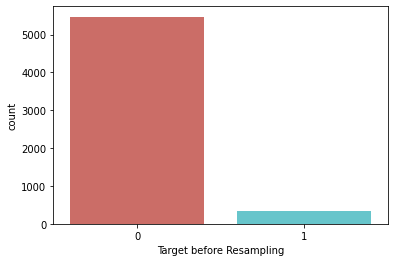

In [ ]:
# Classes counts
sns.countplot(x='V85',data=data, palette='hls')
plt.xlabel("Target before Resampling")
plt.show()

In [ ]:
np.bincount(y)

array([5474,  348])

#SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x_resampled, y_resampled = oversample.fit_resample(X, y)
np.bincount(y_resampled)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


array([5474, 5474])

In [ ]:
from imblearn.pipeline import make_pipeline as make_imb_pipeline
from sklearn.linear_model import LogisticRegressionCV
smote_pipe = make_imb_pipeline(SMOTE(),RandomForestClassifier())
scores = cross_validate(smote_pipe,
                        X,y , cv=10,
                        scoring=('roc_auc', 'average_precision'))
scores['test_roc_auc'].mean(), scores['test_average_precision'].mean()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

(0.670587361474167, 0.11908197395616571)

#RandomUndersampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(replacement=False)
X_train_subsample, y_train_subsample = rus.fit_sample(
    X, y)
print(X.shape)
print(X_train_subsample.shape)
print(np.bincount(y_train_subsample))
print(np.bincount(y))

(5822, 85)
(696, 85)
[348 348]
[5474  348]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from imblearn.pipeline import make_pipeline as make_imb_pipeline
from sklearn.linear_model import LogisticRegressionCV
undersample_pipe = make_imb_pipeline(RandomUnderSampler(), LogisticRegressionCV(max_iter=1000))
scores = cross_validate(undersample_pipe,
                        X_train_subsample, y_train_subsample, cv=10,
                        scoring=('roc_auc', 'average_precision'))
scores['test_roc_auc'].mean(), scores['test_average_precision'].mean()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_it

(0.7317106842737096, 0.7256492246681624)

#RandomOversampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X_train_oversample, y_train_oversample = ros.fit_sample(
    X, y)
print(X.shape)
print(X_train_oversample.shape)
print(np.bincount(y_train_oversample))

(5822, 85)
(10948, 85)
[5474 5474]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


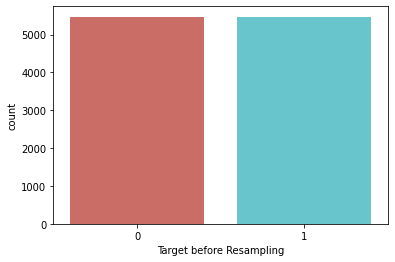

In [ ]:
# Classes counts
sns.countplot(x=y, palette='hls')
plt.xlabel("Target before Resampling")
plt.show()

Univariate Selection with SelectKBest

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

   Specs       Score
46   V46  380.691708
60   V60  191.696446
0     V0  190.696878
58   V58  100.332586
29   V29   82.130521
63   V63   80.693160
67   V67   78.757821
15   V15   75.173970
81   V81   72.088379
30   V30   71.638337


In [ ]:
selected_features= featureScores.nlargest(10,'Score')['Specs'].values
selected_features

array(['V46', 'V60', 'V0', 'V58', 'V29', 'V63', 'V67', 'V15', 'V81',
       'V30'], dtype=object)

Feature Importance (ExtraTreeClassifier)

[3.29827964e-02 7.48585538e-03 1.13328450e-02 1.31574157e-02
 2.19900341e-02 1.06663395e-02 1.46845486e-02 1.48478700e-02
 1.47085798e-02 1.42027509e-02 1.06200928e-02 1.31485922e-02
 1.33338201e-02 1.47737003e-02 1.51139804e-02 1.52947453e-02
 1.67719510e-02 1.55393021e-02 1.36346760e-02 1.09659832e-02
 8.11590228e-03 1.64679090e-02 1.42102199e-02 1.45498727e-02
 1.38514062e-02 1.44497260e-02 1.47241697e-02 1.44945755e-02
 1.20500827e-02 1.32882644e-02 1.33081953e-02 1.32801685e-02
 1.29987892e-02 1.27194746e-02 1.30253861e-02 1.28393282e-02
 1.36616681e-02 1.51610295e-02 1.55004749e-02 1.33619785e-02
 7.11950117e-03 1.38942581e-02 2.43916441e-02 2.54394191e-02
 2.85849792e-03 8.76848150e-04 5.36685230e-02 1.35932898e-03
 9.37083202e-03 1.76582566e-05 2.71389025e-03 2.80983477e-03
 3.33482770e-05 7.15825271e-03 1.37243749e-02 2.29174516e-04
 3.87951489e-03 3.18263907e-03 6.23942119e-02 4.16174394e-04
 8.81843813e-03 7.70058444e-03 2.76903401e-03 7.70238915e-03
 1.78811646e-02 2.846639

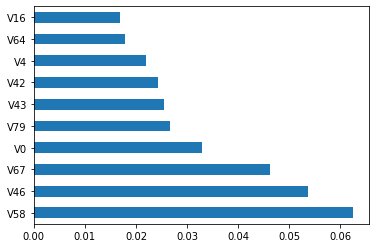

In [ ]:
import pandas as pd
import numpy as np

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

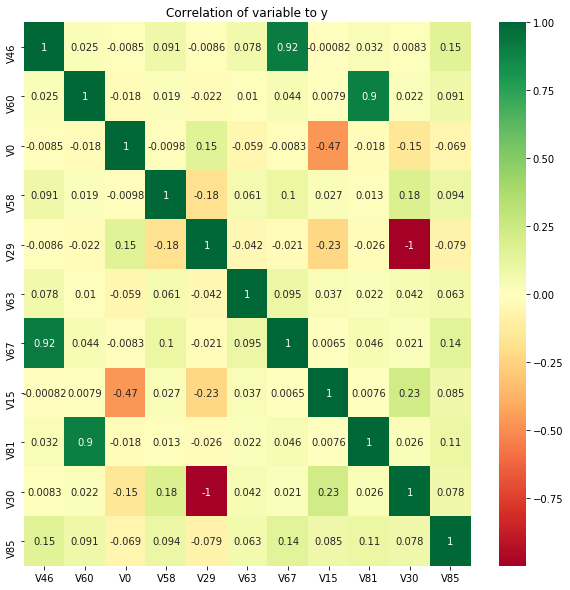

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
# data = pd.read_csv("D://Blogs//train.csv")
corr_with_y = ['V46', 'V60', 'V0', 'V58', 'V29', 'V63', 'V67', 'V15', 'V81','V30','V85']
X_features = data[corr_with_y]  #independent columns
y_features = data.iloc[:,-1]    #target column i.e price range
#get correlations of each features in dataset 
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
plt.title("Correlation of variable to y")

#plot heat map
g=sns.heatmap(X_features.corr(),annot=True,cmap="RdYlGn")

Resampling Using RandomOverSampler

In [ ]:
 from imblearn.over_sampling import RandomOverSampler
 ros = RandomOverSampler(random_state=0)
 X_resampled, y_resampled = ros.fit_resample(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


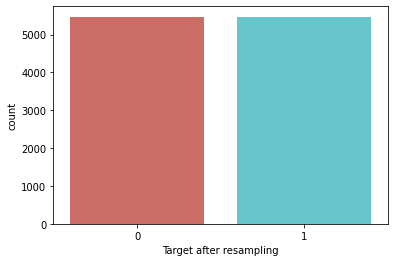

In [ ]:
sns.countplot(x=y_resampled, palette='hls')
plt.xlabel("Target after resampling")
plt.show()

GridSearch for C in Logistic Regression (This will execute for around 5-6 mins)

In [ ]:
from sklearn.model_selection import GridSearchCV
model= LogisticRegression(penalty='l1',solver='liblinear')

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]} 
grid = GridSearchCV(model, param_grid, cv=5,verbose=2, n_jobs=1,return_train_score=True, scoring='accuracy')
grid.fit(X_resampled,y_resampled)
print(grid.best_params_)
print(grid.score(X_test,y_test))

Best features that are selected through GridSearch

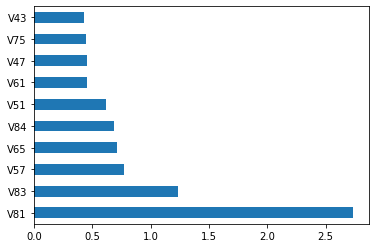

In [ ]:
col_names = list(data.drop(['V85'], axis=1).columns)
coeff=[]
for i in grid.best_estimator_.coef_:
  for j in i:
    coeff.append(j)
coef_dict= dict(zip(col_names,coeff))    
# print(grid.best_estimator_.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(coeff, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline,make_pipeline
poly= PolynomialFeatures()
model= LogisticRegression(penalty='l1',solver='liblinear')
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
model_pipe= Pipeline([('poly',PolynomialFeatures()),('LogReg',model)])
scores= cross_val_score(model_pipe,X[selected_features],y,cv=5,scoring='accuracy')
print("Accuracy with Plynomials: ",np.mean(scores))

Accuracy with Plynomials:  0.9391960532719793


DecisionTrees Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier(random_state=0)
scores= cross_val_score(clf_dt,X, y,cv=5,scoring='accuracy')
print("Accuracy with Plynomials: ",np.mean(scores))


Accuracy with Plynomials:  0.9196233971851788


In [ ]:
from sklearn.metrics import classification_report
clf_dt.fit(X, y)
y_pred = clf_dt.predict(X_test)
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93      3762
           1       0.13      0.19      0.15       238

    accuracy                           0.87      4000
   macro avg       0.54      0.56      0.54      4000
weighted avg       0.90      0.87      0.89      4000

Confusion Matrix:
[[3450  312]
 [ 192   46]]


In [ ]:
 from sklearn.model_selection import GridSearchCV

sample_split_range = list(range(1, 50))
# param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
param_grid = dict(min_samples_split=sample_split_range)
grid = GridSearchCV(clf_dt, param_grid, cv=5,verbose=2, n_jobs=8,return_train_score=True, scoring='f1')
grid.fit(X_resampled,y_resampled)
print(grid.best_params_)
print(grid.score(X_test,y_test))

Fitting 5 folds for each of 49 candidates, totalling 245 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    6.8s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   20.2s


{'min_samples_split': 5}
0.12678936605316976


[Parallel(n_jobs=8)]: Done 245 out of 245 | elapsed:   30.6s finished


RandomForests with RepeatedStratifiedKFold

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import ShuffleSplit,RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
clf_rf = RandomForestClassifier(n_estimators=100)
scores= cross_val_score(clf_rf,X,y,cv=cv,scoring='f1')
print('Mean f1 score: %.3f' % np.mean(scores))

Mean f1 score: 0.071


RandomForests with weighted classes

In [ ]:
# define model
model = RandomForestClassifier(n_estimators=10, class_weight='balanced')
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='f1', cv=cv, n_jobs=-1)
# summarize performance
print('Mean f1 score: %.3f' % np.mean(scores))

Mean f1 score: 0.077


Easy Ensemble Classifier

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.ensemble import EasyEnsembleClassifier

# define model
model = EasyEnsembleClassifier(n_estimators=10)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='f1', cv=cv, n_jobs=-1)
# summarize performance
print('Mean f1 score: %.3f' % np.mean(scores))

Mean f1 score: 0.200


RandomForest with Balanced_subsample

In [ ]:
# define model
model = RandomForestClassifier(n_estimators=10, class_weight='balanced_subsample')
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='f1', cv=cv, n_jobs=-1)
# summarize performance
print('Mean f1 score: %.3f' % np.mean(scores))

Mean f1 score: 0.094


BalancedBaggingClassifier with base estimator DecisionTreeClassifier

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.ensemble import BalancedBaggingClassifier

model = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier())
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
f1_scores = cross_val_score(model, X, y, scoring='f1', cv=cv, n_jobs=-1)
# summarize performance
print('Mean f1 score: %.3f' % np.mean(f1_scores))

Mean f1 score: 0.216


In [ ]:
from sklearn.metrics import classification_report
model = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier())
model.fit(X,y)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

              precision    recall  f1-score   support

           0       0.96      0.79      0.87      3762
           1       0.12      0.43      0.18       238

    accuracy                           0.77      4000
   macro avg       0.54      0.61      0.53      4000
weighted avg       0.91      0.77      0.83      4000

Confusion Matrix:
[[2987  775]
 [ 136  102]]


Parameter Tuning for best model with best f1 score

In [ ]:
from sklearn.model_selection import GridSearchCV
best_model= BalancedBaggingClassifier()
param_grid = { 
    'base_estimator__max_depth' : [1, 2, 3, 4, 5],
    'max_samples' : [0.05, 0.1, 0.2, 0.5]
}
grid = GridSearchCV(best_model, param_grid, cv=5,verbose=2, n_jobs=1,return_train_score=True, scoring='f1')
grid.estimator.fit(X,y)
# print(grid.estimator.base_estimator__max_depth)
print(grid.estimator.score(X_test,y_test))
y_pred = grid.estimator.predict(X_test)
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

0.78125
              precision    recall  f1-score   support

           0       0.96      0.80      0.87      3762
           1       0.13      0.46      0.20       238

    accuracy                           0.78      4000
   macro avg       0.54      0.63      0.54      4000
weighted avg       0.91      0.78      0.83      4000

Confusion Matrix:
[[3016  746]
 [ 129  109]]


Precision-Recall with best model predictions

Text(0, 0.5, 'recall')

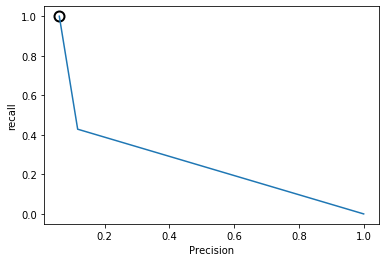

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

precision, recall, thresholds = precision_recall_curve(
    y_test, y_pred)#clf_rf.predict(X_test))
close_zero=np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero],recall[close_zero],'o',markersize=10,label='zero threshold',fillstyle="none",c='k',mew=2)
plt.plot(precision,recall,label='precision recall curve')
plt.xlabel("Precision")
plt.ylabel("recall")
# disp= plot_precision_recall_curve(clf_rf,X_test,y_test)
# disp.ax_.set_title('2-class Precision-Recall curve: '
#                    'AP={0:0.2f}'.format(average_precision))

ROC Curve for best model predictions

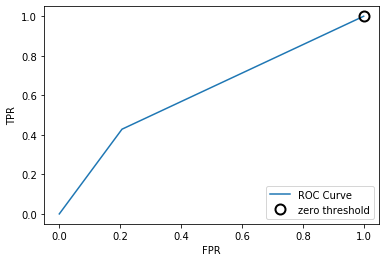

In [ ]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds= roc_curve(y_test,y_pred )
plt.plot (fpr,tpr,label='ROC Curve')
plt.xlabel("FPR")
plt.ylabel("TPR")
close_zero=np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero],tpr[close_zero],'o',markersize=10,label='zero threshold',fillstyle="none",c='k',mew=2)
plt.legend(loc=4)

Testing Gradient boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_resampled, y_resampled)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_test, y_test)))

Learning rate:  0.05
Accuracy score (training): 0.660
Learning rate:  0.075
Accuracy score (training): 0.658
Learning rate:  0.1
Accuracy score (training): 0.663
Learning rate:  0.25
Accuracy score (training): 0.666
Learning rate:  0.5
Accuracy score (training): 0.685
Learning rate:  0.75
Accuracy score (training): 0.680
Learning rate:  1
Accuracy score (training): 0.691


In [ ]:
gb_clf_best = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=0)
gb_clf_best.fit(X_resampled,y_resampled)
y_pred=gb_clf_best.predict(X_test)
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.69      0.80      3762
           1       0.11      0.60      0.18       238

    accuracy                           0.69      4000
   macro avg       0.54      0.65      0.49      4000
weighted avg       0.91      0.69      0.77      4000

Confusion Matrix:
[[2597 1165]
 [  95  143]]


Testing SVM 

In [ ]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_resampled, y_resampled)
y_pred=svclassifier.predict(X_test)
print("Accuracy : ",svclassifier.score(X_test, y_test))
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy :  0.69525
              precision    recall  f1-score   support

           0       0.97      0.70      0.81      3762
           1       0.12      0.63      0.20       238

    accuracy                           0.70      4000
   macro avg       0.54      0.66      0.50      4000
weighted avg       0.92      0.70      0.78      4000

Confusion Matrix:
[[2631 1131]
 [  88  150]]


Explainable Model : 
Since Balanced bagging classifier with base_estimator DecisionTreeClassifier has highest f1 score. I am assuming DecisionTree can be an explainable model for this dataset

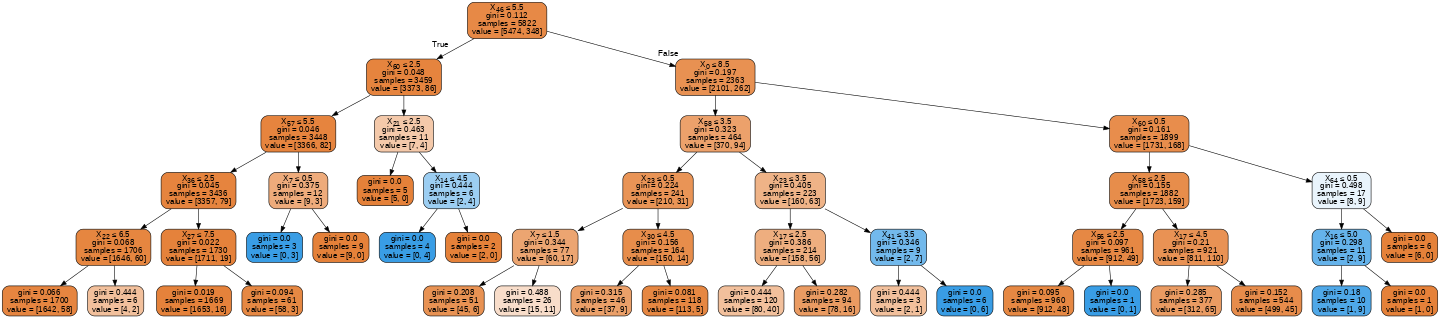

In [ ]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dtree=DecisionTreeClassifier(max_depth=5)
dtree.fit(X,y)

dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
graph.set_size('"15,15!"') 
Image(graph.create_png())